In [329]:
#importing liabraries we need in our predectif model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score


In [330]:
#moading the house prices dataset
price_house_filepath=("D:/2020/go my code/kc_house_data.csv")
house_data=pd.read_csv(price_house_filepath, encoding="ISO_8859_1")
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Data preprocessing and visualization 

In [17]:
#Cheking if there is any missing values
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [331]:
#removing th useless features from the data set
house_data.drop('date', axis=1, inplace=True)

exploring data 

In [59]:

house_data['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [19]:
house_data['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [156]:
house_data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

Data visualization using seaborne library 

Text(0.5, 1.0, 'Dependencies between price and view')

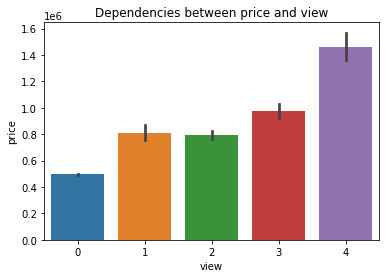

In [4]:
sns.barplot(x=house_data['view'], y=house_data['price'])
plt.title('Dependencies between price and view')

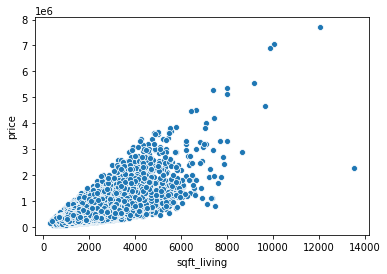

In [21]:

sns.scatterplot(x=house_data['sqft_living'], y=house_data['price'])
plt.show()

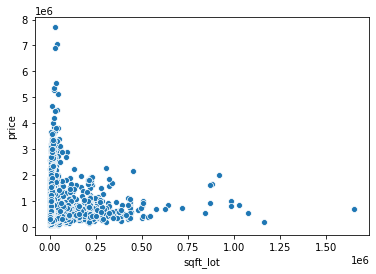

In [22]:
sns.scatterplot(x=house_data['sqft_lot'], y=house_data['price'])
plt.show()

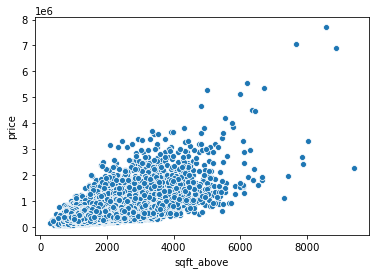

In [23]:
sns.scatterplot(x=house_data['sqft_above'], y=house_data['price'])
plt.show()

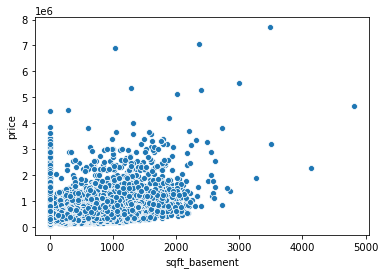

In [84]:
sns.scatterplot(x=house_data['sqft_basement'], y=house_data['price'])
plt.show()

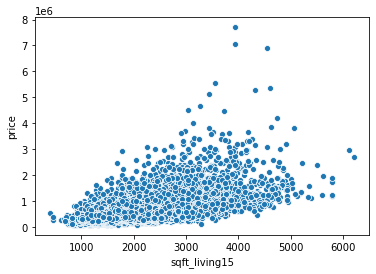

In [24]:
sns.scatterplot(x=house_data['sqft_living15'], y=house_data['price'])
plt.show()

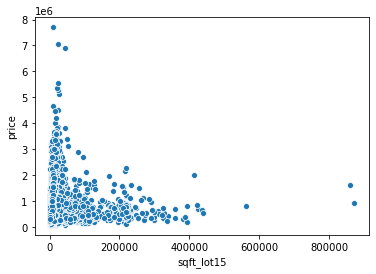

In [88]:
sns.scatterplot(x=house_data['sqft_lot15'], y=house_data['price'])
plt.show()

## creating new features : total rooms

In [332]:
house_data['total_rooms']=house_data['bedrooms']+house_data['bathrooms']+house_data['floors']+house_data['view']
house_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_rooms
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,5.00
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,7.25
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,4.00
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,8.00
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,8.50
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8.50
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,4.75
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,7.50


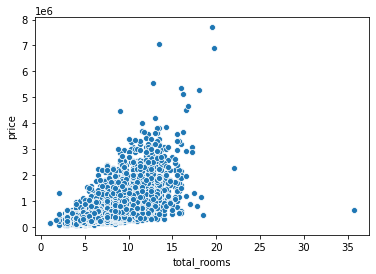

In [158]:
sns.scatterplot(x=house_data['total_rooms'], y=house_data['price'])
plt.show()

Features selection : After exploring and preprocessing the dataset, then visualization of the different relationships 
between prices and houses characteristics using seaborne scatter plot command , we noticed a linear correlation between some features and prices output , these features are : sqft_living, sqft_above, sqft_living15, and total_rooms.We created a new feature called total rooms present the sum of 4 features : bethrooms, barooms,view and floors
obsiously, the different distribution charts (scatter plots) make it easy to see that prices get higher with higher sqft living, sqft above, sqft_living and total rooms

### sqft living feature (simple linear regression)

In [333]:
#Loading the input feature and the output targt dataset 
x=house_data['sqft_living'].values[:,np.newaxis]
y=house_data['price'].values

# Spliting the dataset into training set and testing set

In [334]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=40)

# Applying linear regression model to the training data

In [335]:
lg=LinearRegression()
lg.fit(x_train, y_train)
predicted=lg.predict(x_test)


In [204]:
x_test

array([[3830],
       [2750],
       [1910],
       ...,
       [1640],
       [3140],
       [1260]], dtype=int64)

### Measure the performance of linear regression using the testing set

In [336]:
#testing the accuracy of the model using MSE and R squared metrics
print("MSE : ", mean_squared_error(y_test,predicted))
print("R squared: ", r2_score(y_test,predicted))

MSE :  62451720102.954
R squared:  0.5035535751151091


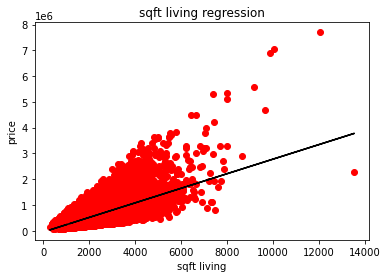

In [337]:
plt.scatter(x,y, color='r')
plt.plot(x, lg.predict(x), color='k')
plt.title("sqft living regression")
plt.xlabel('sqft living')
plt.ylabel('price')
plt.show()

### Total rooms feature linear regression

In [338]:
#loading the total rooms and prices data to figure out the linear regression plot
x=house_data['total_rooms'].values[:,np.newaxis]
y=house_data['price'].values

In [207]:
x.shape

(21613, 1)

In [347]:
#splitting the dataset into training set and testing set
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.1, random_state=40)

In [348]:
#applying the linear regression
lg.fit(x_train,y_train)

LinearRegression()

In [349]:
predicted=lg.predict(x_test)

Text(0, 0.5, 'price')

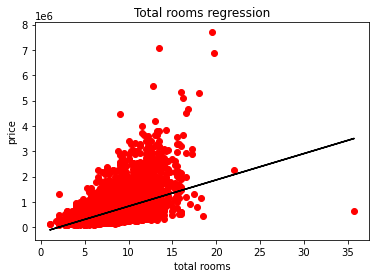

In [350]:
plt.scatter(x,y, color='r')
plt.plot(x, lg.predict(x), color='k')
plt.title("Total rooms regression")
plt.xlabel('total rooms')
plt.ylabel('price')

In [351]:
#testing the accuracy of the model using MSE and R squared metrics
print("MSE: ", mean_squared_error(y_test, predicted))
print("R squared: ", r2_score(y_test,predicted))

MSE:  79722069444.32323
R squared:  0.3160735244272518


### sqft living15 feature (simple linear regression)

In [354]:
#load dataset for linear regression : feature sqft_living15
x=house_data['sqft_living15'].values[:,np.newaxis]
y=house_data['price'].values

In [355]:
#split the dataset into training set and testing set
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=40)

In [356]:
#training our linear regression model
lg.fit(x_train, y_train)

LinearRegression()

In [357]:
#testing the accuracy of the model using MSE and R squared metrics
pred_price=lg.predict(x_test)
print("MSE : ", mean_squared_error(y_test, pred_price))
print("R squared", r2_score(y_test, pred_price))

MSE :  80933367515.28435
R squared 0.3566377212569781


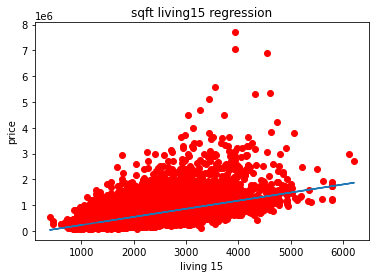

In [358]:
#showing the linear regression and scatter plot
plt.scatter(x,y,color='r')
plt.plot(x, lg.predict(x))
plt.title("sqft living15 regression")
plt.xlabel('living 15')
plt.ylabel('price')
plt.show()

### sqft_above feature (simple linear regression)

In [217]:
x=house_data['sqft_above'].values[:,np.newaxis]
y=house_data['price'].values

In [218]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=40)

In [219]:
lg.fit(x_train,y_train)

LinearRegression()

In [220]:
#testing the accuracy of the model using MSE and R squared metrics
predicted=lg.predict(x_test)
print("MSE: ", mean_squared_error(y_test,predicted))
print("R squared", r2_score(y_test, predicted))

MSE:  78645081812.31802
R squared 0.37482795291881355


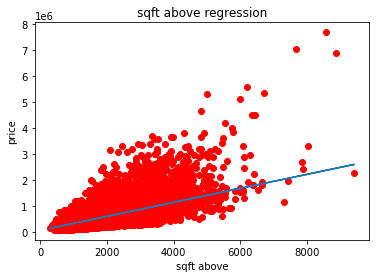

In [199]:
plt.scatter(x,y, color='r')
plt.plot(x, lg.predict(x))
plt.title("sqft above regression")
plt.xlabel('sqft above')
plt.ylabel('price')
plt.show()

In [222]:
#feature selection for linear regression 
MSE_sqrt_living=62451720102.954
MSE_total_rooms=79722069444.32323
MSE_sqrt_living15=80933367515.28435
MSE_sqrt_above=78645081812.31802
min(MSE_sqrt_living,MSE_total_rooms,MSE_sqrt_living15,MSE_bed_bath_rooms,MSE_sqrt_above)

62451720102.954

### applying multi-linear regression 

In [317]:
#multi linear regression
x=house_data[['sqft_living','total_rooms', 'sqft_above', 'sqft_living15']]
y=house_data['price']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=40)


In [318]:
lg.fit(x_train, y_train)

LinearRegression()

In [320]:
predicted=lg.predict(x_test)

In [326]:
y_test

21568    1700000.0
3040      763776.0
198       440000.0
16456     470000.0
19502     445000.0
           ...    
12385     599990.0
18099     150000.0
9347      375000.0
18718     946000.0
8642      380000.0
Name: price, Length: 4323, dtype: float64

In [227]:
#Apply metrics to figure out our multi  linear regression model
print("MSE : ", mean_squared_error(y_test,predicted))
print("R squared: ", r2_score(y_test,predicted))

MSE :  61188873161.620316
R squared:  0.5135923034026311


In [324]:
x_test

,sqft_living,total_rooms,sqft_above,sqft_living15
21568,3830,9.50,3120,2190
3040,2750,8.50,2750,2810
198,1910,7.50,1910,2330
16456,1730,6.00,1730,2130
19502,2420,10.00,2420,1510
...,...,...,...,...
12385,2680,6.25,1570,2480
18099,890,4.00,890,1260
9347,1640,6.25,1640,1640
18718,3140,8.00,2140,2760


In [328]:
lg.predict([[1260,5.00,1260,1760]])

array([310265.96105365])

### comparing multi-linear regression to linear model
by applying a multi-linear regression algorithm we get better accuracy to our predicitve model, Mean squared error is slithly lower then in linear model. 

### applying polynomial regression algorithm

In [411]:
#loading our data
x=house_data['sqft_living'].values.reshape(-1,1)
y=house_data['price'].values
#split data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.35, random_state=40)



In [412]:
#polynomial regression code
poly=PolynomialFeatures(degree=2)
lg=LinearRegression()
x_train_=poly.fit_transform(x_train)
poly.fit(x_train_,y_train)
lg.fit(x_train_,y_train)
x_test_=poly.fit_transform(x_test)
predicted=lg.predict(x_test_)


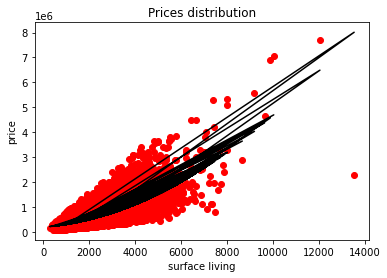

In [413]:
plt.scatter(x,y, color='r')
plt.title('Prices distribution')
plt.xlabel('surface living')
plt.ylabel('price')
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")
plt.show()

In [414]:
max(x)

array([13540], dtype=int64)

In [363]:
#polynomial regression model accuracy using sklearn metrics
print("MSE :", mean_squared_error(y_test,predicted ))
print("R squared : ", r2_score(y_test, predicted))

MSE : 57753648354.731514
R squared :  0.5406078367860319


In [277]:
#comparing the mean square error between different polynomial regression degrees(2,3 and 4)
#(4,2,3)
min(58253962567.99721,57753648354.731514,58237063962.54639)

57753648354.731514

In [368]:
r=poly.fit_transform([[1700]] )
print("s= ", lg.predict(r))

s=  [425749.45303661]


In [359]:
x_train, y_train

(array([[2580],
        [1910],
        [2950],
        ...,
        [1100],
        [1700],
        [1300]], dtype=int64),
 array([ 515000., 1000000.,  525000., ...,  171500.,  930000.,  255000.]))

In [396]:
#loading dataset for multi_polynomial regression
x=house_data[['sqft_living', 'sqft_above']]
y=house_data['price'].values
#split dataset into training and testing data
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=40)

In [397]:
poly=PolynomialFeatures(degree=2)
lg=LinearRegression()
x_train_=poly.fit_transform(x_train)
poly.fit(x_train_,y_train)
lg.fit(x_train_,y_train)
x_test_=poly.fit_transform(x_test)
predicted=lg.predict(x_test_)

In [398]:
#polynomial regression model accuracy using sklearn metrics
print("MSE :", mean_squared_error(y_test,predicted ))
print("R squared : ", r2_score(y_test, predicted))

MSE : 57499263504.23601
R squared :  0.5429220563799645


In [403]:
x_test, y_test

(       sqft_living  sqft_above
 21568         3830        3120
 3040          2750        2750
 198           1910        1910
 16456         1730        1730
 19502         2420        2420
 ...            ...         ...
 12385         2680        1570
 18099          890         890
 9347          1640        1640
 18718         3140        2140
 8642          1260        1260
 
 [4323 rows x 2 columns],
 array([1700000.,  763776.,  440000., ...,  375000.,  946000.,  380000.]))

In [407]:
r=poly.fit_transform([[3140,2140]])
print("s= ", lg.predict(r))


s=  [828584.44048112]


### comparing polynomial regression to linear and multi-linear model
Obviously, we get better accure model with polynomial regression, and we can ameliorate the model performance if we apply multi_polynomial regression model according to the metrics indexes such as mean squared error. but the problem with polynomial regression is that we have overfitting problem and outliers which make our model less predective

##removing the outlier and checking the model again

In [ ]:
house_data.drop(13540, axis=0, inplace=True)

In [449]:
#loading our data
x=house_data[['sqft_living','sqft_above']]
y=house_data['price'].values
#split data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.35, random_state=40)

In [450]:
poly=PolynomialFeatures(degree=2)
lg=LinearRegression()
x_train_=poly.fit_transform(x_train)
poly.fit(x_train_,y_train)
lg.fit(x_train_,y_train)
x_test_=poly.fit_transform(x_test)
predicted=lg.predict(x_test_)

In [451]:
#polynomial regression model accuracy using sklearn metrics
print("MSE :", mean_squared_error(y_test,predicted ))
print("R squared : ", r2_score(y_test, predicted))

MSE : 56240426839.067665
R squared :  0.5406019296184097


In [424]:
56240426839.067665>57499263504.23601

False

after dropping the outlier value of sqft_living we get a better accuracy applying our multi_polynomial regression model

In [452]:
x_test, y_test

(       sqft_living  sqft_above
 10228         1560        1560
 10148         1320        1320
 198           1910        1910
 4013          3000        3000
 20587         2630        2030
 ...            ...         ...
 1163          2940        2940
 18587         1180        1180
 19694         2320        2320
 14088         1580        1580
 7094          1640        1140
 
 [7565 rows x 2 columns],
 array([254000., 333500., 440000., ..., 340000., 335000., 221000.]))

In [453]:
r=poly.fit_transform([[1580,1580]])
print("s= ", lg.predict(r))


s=  [390477.03621345]
